## In questo file andiamo ad applicare algoritmi di clustering dopo aver eliminato eventuali duplicati ed aver ridotto le dimensioni del dataset con undersampling

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import os

In [2]:
nome_file='Friday-02-03-2018_TrafficForML_CICFlowMeter'

with open('pickle/'+nome_file+'/scaled_document.pickle', 'rb') as handle:

    df = pickle.load(handle)

In [3]:
#eliminazione duplicati

df = df.drop_duplicates()

In [4]:
#contiamo il numero di elementi per ogni label

df_prova = df.groupby(['Label'])['Label'].count()

df_prova=df_prova.to_frame()
print(df_prova)
df_prova.set_index('Label')
df_prova=df_prova.rename(columns={'Label':'Count'})

        Label
Label        
0      627052
1      144535


In [5]:
df.shape

(771587, 67)

In [6]:
# Seleziona una frazione casuale delle righe in base a una colonna specifica
# Selezioniamo il 50% delle righe

colonna_interessata = 'Label'
frazione_da_selezionare = 0.5  # Ad esempio, seleziona il 50% delle righe


df = df.groupby(colonna_interessata).apply(lambda x: x.sample(frac=frazione_da_selezionare, random_state=42)).reset_index(drop=True)

In [7]:
df.shape

(385794, 67)

In [8]:
df

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.095340,0.000232,0.000159,0.001147,0.000016,0.386324,0.0,0.078580,0.188610,0.803425,...,0.454545,0.027917,0.000000,0.027917,0.027917,0.049279,0.000000,0.049279,0.049279,0
1,0.105793,0.000278,0.000231,0.002367,0.000103,0.414962,0.0,0.137250,0.266596,1.000000,...,0.454545,0.025076,0.000000,0.025076,0.025076,0.082598,0.000000,0.082598,0.082598,0
2,0.455007,0.000023,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,0.039456,0.000162,0.000101,0.001039,0.000016,0.395675,0.0,0.097945,0.220821,0.803425,...,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,0.967553,0.000440,0.000289,0.000926,0.000065,0.246055,0.0,0.034897,0.118001,1.000000,...,0.454545,0.000447,0.001033,0.002660,0.000245,0.080216,0.016843,0.083333,0.046396,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385789,0.000085,0.000046,0.000058,0.000296,0.000001,0.190532,0.0,0.074429,0.182314,0.076712,...,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
385790,0.000090,0.000046,0.000058,0.000296,0.000001,0.190532,0.0,0.074429,0.182314,0.076712,...,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
385791,0.000133,0.000046,0.000058,0.000296,0.000001,0.190532,0.0,0.074429,0.182314,0.076712,...,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
385792,0.000105,0.000046,0.000058,0.000296,0.000001,0.190532,0.0,0.074429,0.182314,0.076712,...,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [9]:
#contiamo il numero di elementi per ogni label

df_prova = df.groupby(['Label'])['Label'].count()

df_prova=df_prova.to_frame()
print(df_prova)
df_prova.set_index('Label')
df_prova=df_prova.rename(columns={'Label':'Count'})

        Label
Label        
0      313526
1       72268


In [10]:
#prendiamo due feature alla volta

feature_1 = 'Init Bwd Win Byts'
feature_2 = 'Fwd Pkts/s'


df = df[[feature_1, feature_2,'Label']]

In [11]:
bot = df[df.Label == 1]
benign = df[df.Label == 0]

print("Benign: ", len(benign), "Bot: ", len(bot))

Benign:  313526 Bot:  72268


In [12]:
#bilanciamento del dataset
balanced_d = pd.concat([bot, benign.sample(len(bot))])
bal_x = balanced_d.iloc[:,:-1]
bal_y = balanced_d.iloc[:,-1:]
balanced_d.shape

(144536, 3)

In [ ]:
n_clusters = len(balanced_d['Label'].unique())  # numero di cluster

In [13]:
# Eseguiamo il clustering con Kmeans

y_pred = KMeans(n_clusters=n_clusters).fit_predict(bal_x)

# Associazione del cluster i-esimo con la classe i-esima
cluster_class_mapping = {}
for i in range(n_clusters):
    cluster_samples = bal_x[y_pred == i]
    cluster_classes = bal_y[y_pred == i]
    unique_classes, class_counts = np.unique(cluster_classes, return_counts=True)
    dominant_class = unique_classes[np.argmax(class_counts)]
    cluster_class_mapping[i] = dominant_class

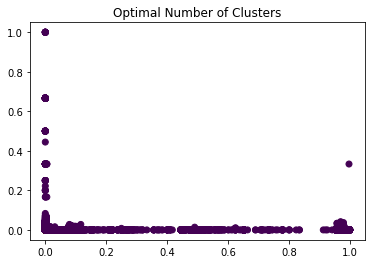

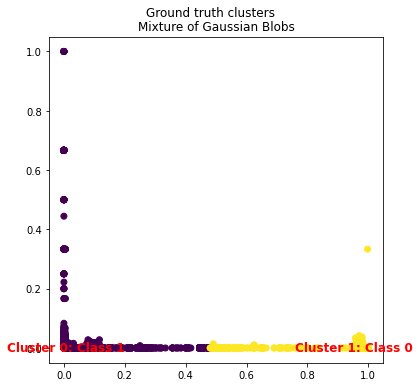

In [15]:
# Plot dei risultati

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
axs.scatter(bal_x[feature_1], bal_x[feature_2], c=y_pred)
axs.set_title("K-means")
plt.xlabel(feature_1)
plt.ylabel(feature_2)

difference = pd.DataFrame(data=[],columns=['num_cluster','num_class'])
# Stampiamo l'associazione del cluster con la classe
for i in range(n_clusters):
    if(i != cluster_class_mapping[i]):

        new_row = pd.Series({'num_cluster': i, 'num_class': cluster_class_mapping[i]})
        difference = pd.concat([difference,new_row.to_frame().T],ignore_index=True)
        
    axs.text(
        np.mean(bal_x[feature_1][y_pred == i]), np.mean(bal_x[feature_2][y_pred == i]),
        f"Cluster {i}: Class {cluster_class_mapping[i]}",
        fontsize=12, fontweight='bold', color='red', ha='center', va='center'
    )

title = ("K-means " + str(feature_1) + " " + str(feature_2))
feature_name = title.replace('/','_')
if not os.path.exists('image/'+nome_file+'/clustering/'):
    os.makedirs('image/'+nome_file+'/clustering/')
plt.savefig('image/'+nome_file+'/clustering/'+str(feature_name)+'.png')

plt.show()

In [16]:
# se il numero del cluster e la classe non coincidono, andiamo ad effettuare uno switch

indici = []

for a in difference['num_cluster']:
    indici.append([
    index for index in range(len(y_pred))
    if y_pred[index] == a
])

for ind,true_value in zip(indici,difference['num_class']):
    for a in ind:
        y_pred[a] = true_value

In [17]:
accuracy_kmeans = str(accuracy_score(y_pred,bal_y))
precision_kmeans = str(precision_score(y_pred,bal_y))
recall_kmeans = str(recall_score(y_pred,bal_y))

# accuratezza kmeans
print("accuratezza" + accuracy_kmeans)
# precision kmeans
print("precision" + precision_kmeans)
# recall kemans
print("recall" + recall_kmeans)


metriche = pd.DataFrame({
    'metriche': ["accuracy","precision","recall"],
    'valori': [accuracy_kmeans,precision_kmeans,recall_kmeans]
})

if not os.path.exists('metriche/'+nome_file):
    os.makedirs('metriche/'+nome_file)

metriche.to_csv('metriche/'+nome_file+'/metriche_kmeans.csv',index=False)

0.6463234073172082


In [19]:
#clustering gerarchico

hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(bal_x)

# Associazione del cluster i-esimo con la classe i-esima
cluster_class_mapping = {}
for i in range(n_clusters):
    cluster_samples = bal_x[y_hc == i]
    cluster_classes = bal_y[y_hc == i]
    unique_classes, class_counts = np.unique(cluster_classes, return_counts=True)
    dominant_class = unique_classes[np.argmax(class_counts)]
    cluster_class_mapping[i] = dominant_class

plt.figure(figsize=(15,8))
plt.scatter(bal_x.iloc[:, 0], bal_x.iloc[:, 1], c=y_hc)

difference = pd.DataFrame(data=[],columns=['num_cluster','num_class'])
# Stampiamo l'associazione del cluster con la classe
for i in range(n_clusters):
    if(i != cluster_class_mapping[i]):

        new_row = pd.Series({'num_cluster': i, 'num_class': cluster_class_mapping[i]})
        difference = pd.concat([difference,new_row.to_frame().T],ignore_index=True)
        
    plt.text(
        np.mean(bal_x[feature_1][y_hc == i]), np.mean(bal_x[feature_2][y_hc == i]),
        f"Cluster {i}: Class {cluster_class_mapping[i]}",
        fontsize=12, fontweight='bold', color='red', ha='center', va='center'
    )

plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.legend()
plt.show()

MemoryError: Unable to allocate 77.8 GiB for an array with shape (10445255380,) and data type float64

In [ ]:
# se il numero del cluster e la classe non coincidono, andiamo ad effettuare uno switch

indici = []

for a in difference['num_cluster']:
    indici.append([
    index for index in range(len(y_hc))
    if y_hc[index] == a
])

for ind,true_value in zip(indici,difference['num_class']):
    for a in ind:
        y_hc[a] = true_value

In [ ]:
accuracy_gerarchico = str(accuracy_score(y_hc,bal_y))
precision_gerarchico = str(precision_score(y_hc,bal_y))
recall_gerarchico = str(recall_score(y_hc,bal_y))

# accuratezza gerarchico
print("accuratezza" + accuracy_gerarchico)
# precision gerarchico
print("precision" + precision_gerarchico)
# recall gerarchico
print("recall" + recall_gerarchico)

metriche = pd.DataFrame({
    'metriche': ["accuracy","precision","recall"],
    'valori': [accuracy_gerarchico,precision_gerarchico,recall_gerarchico]
})

if not os.path.exists('metriche/'+nome_file):
    os.makedirs('metriche/'+nome_file)

metriche.to_csv('metriche/'+nome_file+'/metriche_gerarchico.csv',index=False)

In [ ]:
#individuazione dell'eps migliore
from sklearn.neighbors import NearestNeighbors
import numpy as np
import random

values = bal_x.values
neigh = NearestNeighbors(n_neighbors=5, n_jobs=4, algorithm='ball_tree', leaf_size=5)
nbrs = neigh.fit(values)
distances, indices = nbrs.kneighbors(values)

distances = np.sort(distances, axis=0)
plt.figure(figsize=(12,8))
plt.plot(distances[:,1])

In [ ]:
# applicazione algoritmo dbscan

from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.01, min_samples=6).fit(values)
y_scan = db.labels_
y_scan

In [ ]:
# Associazione del cluster i-esimo con la classe i-esima
cluster_class_mapping = {}
for i in range(n_clusters):
    cluster_samples = bal_x[y_scan == i]
    cluster_classes = bal_y[y_scan == i]
    unique_classes, class_counts = np.unique(cluster_classes, return_counts=True)
    dominant_class = unique_classes[np.argmax(class_counts)]
    cluster_class_mapping[i] = dominant_class

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Cluster DBSCAN', fontsize = 30)

plt.scatter(values[y_scan == -1, 0], values[y_scan == -1, 1], s = 100, c = 'black')
plt.scatter(values[y_scan == 0, 0], values[y_scan == 0, 1], s = 100, c = 'pink')
plt.scatter(values[y_scan == 1, 0], values[y_scan == 1, 1], s = 100, c = 'green')

colors = { 'Bot':'green','Benign':'pink'}
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
plt.legend(title='color', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.legend()

title = ("DB_Scan " + str(feature_1) + " " + str(feature_2))
feature_name = title.replace('/','_')
if not os.path.exists('image/'+nome_file+'/clustering/'):
    os.makedirs('image/'+nome_file+'/clustering/')
plt.savefig('image/'+nome_file+'/clustering/'+str(feature_name)+'.png')


plt.show()

In [ ]:
# se il numero del cluster e la classe non coincidono, andiamo ad effettuare uno switch

indici = []

for a in difference['num_cluster']:
    indici.append([
    index for index in range(len(y_scan))
    if y_scan[index] == a
])

for ind,true_value in zip(indici,difference['num_class']):
    for a in ind:
        y_scan[a] = true_value

In [ ]:
accuracy_dbscan = str(accuracy_score(y_hc,bal_y))
precision_dbscan = str(precision_score(y_hc,bal_y))
recall_dbscan = str(recall_score(y_hc,bal_y))

# accuratezza dbscan
print("accuratezza" + accuracy_dbscan)
# precision dbscan
print("precision" + precision_dbscan)
# recall dbscan
print("recall" + recall_dbscan)

metriche = pd.DataFrame({
    'metriche': ["accuracy","precision","recall"],
    'valori': [accuracy_dbscan,precision_dbscan,recall_dbscan]
})

if not os.path.exists('metriche/'+nome_file):
    os.makedirs('metriche/'+nome_file)

metriche.to_csv('metriche/'+nome_file+'/metriche_dbscan.csv',index=False)